In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [33]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [34]:
X_train.shape #total images, pixels row, pixels col, rgb channels

(50000, 32, 32, 3)

In [35]:
X_test.shape

(10000, 32, 32, 3)

In [36]:
y_train[:3]#2D array

array([[6],
       [9],
       [9]], dtype=uint8)

In [37]:
y_train = y_train.reshape(-1,)
y_train[:3] #1D

array([6, 9, 9], dtype=uint8)

In [38]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

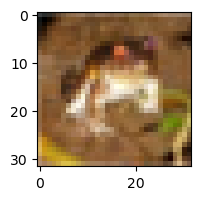

In [39]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [40]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [41]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

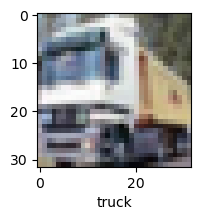

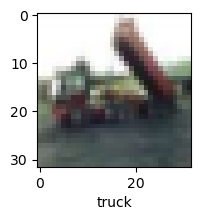

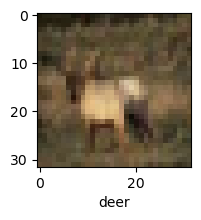

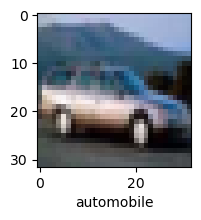

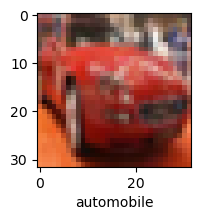

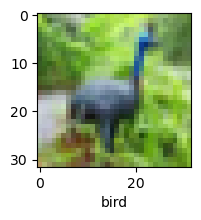

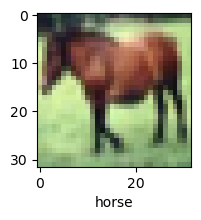

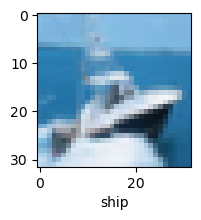

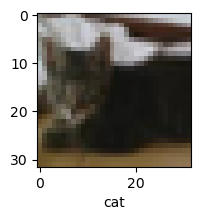

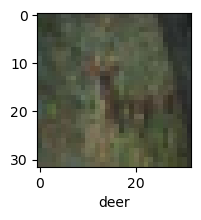

In [42]:
for index in range(1,11):
    plot_sample(X_train, y_train, index)

In [43]:
x_train = X_train/255
x_test = X_test/255

In [44]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# ANN


In [53]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')   
])

ann.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

ann.fit(x_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 103s 65ms/step - loss: 1.8114 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6235 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.5422 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4817 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4325 - accuracy: 0.4963


In [54]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.18      0.93      0.31      1000
           1       0.29      0.33      0.31      1000
           2       0.19      0.35      0.25      1000
           3       0.19      0.37      0.26      1000
           4       0.25      0.00      0.01      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.60      0.00      0.01      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.20     10000
   macro avg       0.17      0.20      0.11     10000
weighted avg       0.17      0.20      0.11     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4732 - accuracy: 0.4705
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1180 - accuracy: 0.6067
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9909 - accuracy: 0.6562
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9034 - accuracy: 0.6856
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8386 - accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7885 - accuracy: 0.7270
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7413 - accuracy: 0.7421
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6932 - accuracy: 0.7586
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6579 - accuracy: 0.7717
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [56]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9510 - accuracy: 0.6906


[0.9510291218757629, 0.6905999779701233]